In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [35]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=20, noise=0.13, factor=0.2)
print(X.size, y.size)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

1000 500


In [36]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1]) # Blue
    plt.scatter(X[y==1, 0], X[y==1, 1]) # Orange
    plt.axis('scaled')

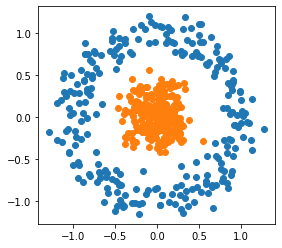

In [37]:
scatter_plot()

In [23]:
class Model(nn.Module):
  def __init__(self, input_size, H1, H2, H3, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, H3)
    self.linear4 = nn.Linear(H3, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    x = torch.sigmoid(self.linear3(x))
    x = torch.sigmoid(self.linear4(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else: 
      return 0

In [24]:
torch.manual_seed(2)
model = Model(2, 4, 4, 3, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073],
        [ 0.2116, -0.2950, -0.1922,  0.4809],
        [-0.4897, -0.0340, -0.0396,  0.3547],
        [-0.0475,  0.1317, -0.0240, -0.2800]], requires_grad=True), Parameter containing:
tensor([-0.2834, -0.2429, -0.4542, -0.3245], requires_grad=True), Parameter containing:
tensor([[ 0.1177,  0.3291,  0.0246, -0.2292],
        [ 0.2197, -0.1919, -0.1108, -0.2741],
        [-0.1570, -0.4633,  0.2133,  0.1944]], requires_grad=True), Parameter containing:
tensor([0.0993, 0.2455, 0.2119], requires_grad=True), Parameter containing:
tensor([[0.0255, 0.0611, 0.0441]], requires_grad=True), Parameter containing:
tensor([0.3081], requires_grad=True)]


In [25]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [26]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  print(y_pred.size(), y_data.size())
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

torch.Size([500, 1]) torch.Size([500, 1])
epoch: 0 loss 0.7108473777770996
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 1 loss 0.6952362060546875
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 2 loss 0.6937694549560547
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 3 loss 0.6971819996833801
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 4 loss 0.6976629495620728
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 5 loss 0.6956403851509094
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 6 loss 0.6937021017074585
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 7 loss 0.6930345296859741
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 8 loss 0.6933485865592957
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 9 loss 0.693918764591217
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 10 loss 0.6942744851112366
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 11 loss 0.6942707300186157
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 12 loss 0.6939638257026672
torch.Size([500, 1]) to

epoch: 160 loss 0.006935118697583675
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 161 loss 0.006744070909917355
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 162 loss 0.006563511211425066
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 163 loss 0.00639338931068778
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 164 loss 0.006233778782188892
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 165 loss 0.006083574611693621
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 166 loss 0.005941149313002825
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 167 loss 0.005805585999041796
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 168 loss 0.005676536820828915
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 169 loss 0.005553508177399635
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 170 loss 0.0054359701462090015
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 171 loss 0.005323705729097128
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 172 loss 0.005216566380113363
torch.Size([500

epoch: 275 loss 0.001647471566684544
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 276 loss 0.0016356816049665213
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 277 loss 0.0016240396071225405
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 278 loss 0.0016125409165397286
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 279 loss 0.0016011818079277873
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 280 loss 0.001589958555996418
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 281 loss 0.0015788720920681953
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 282 loss 0.001567914499901235
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 283 loss 0.0015570919495075941
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 284 loss 0.0015463951276615262
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 285 loss 0.0015358293894678354
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 286 loss 0.0015253785531967878
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 287 loss 0.0015150585677474737
torch

epoch: 391 loss 0.0008543950389139354
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 392 loss 0.0008505209116265178
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 393 loss 0.000846670416649431
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 394 loss 0.0008428460569120944
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 395 loss 0.0008390512084588408
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 396 loss 0.0008352804579772055
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 397 loss 0.0008315497543662786
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 398 loss 0.0008278419263660908
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 399 loss 0.0008241616887971759
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 400 loss 0.0008205047342926264
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 401 loss 0.000816873915027827
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 402 loss 0.0008132683578878641
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 403 loss 0.0008096990641206503
torc

torch.Size([500, 1]) torch.Size([500, 1])
epoch: 600 loss 0.0004070464929100126
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 601 loss 0.0004058987833559513
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 602 loss 0.0004047568654641509
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 603 loss 0.00040361948776990175
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 604 loss 0.00040248531149700284
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 605 loss 0.0004013579455204308
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 606 loss 0.0004002333153039217
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 607 loss 0.0003991136036347598
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 608 loss 0.0003979997127316892
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 609 loss 0.00039689469849690795
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 610 loss 0.00039578607538715005
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 611 loss 0.00039468571776524186
torch.Size([500, 1]) torch.Size([50

torch.Size([500, 1]) torch.Size([500, 1])
epoch: 715 loss 0.00030249758856371045
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 716 loss 0.00030178570887073874
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 717 loss 0.0003010752552654594
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 718 loss 0.00030036739190109074
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 719 loss 0.00029966110014356673
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 720 loss 0.00029895661282353103
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 721 loss 0.0002982569858431816
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 722 loss 0.0002975577372126281
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 723 loss 0.00029686151538044214
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 724 loss 0.000296169426292181
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 725 loss 0.0002954798110295087
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 726 loss 0.00029479165095835924
torch.Size([500, 1]) torch.Size([5

torch.Size([500, 1]) torch.Size([500, 1])
epoch: 818 loss 0.00024096216657198966
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 819 loss 0.00024046313774306327
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 820 loss 0.00023996748495846987
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 821 loss 0.00023947485897224396
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 822 loss 0.00023898253857623786
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 823 loss 0.00023848899581935257
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 824 loss 0.0002380016667302698
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 825 loss 0.0002375108888372779
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 826 loss 0.0002370268921367824
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 827 loss 0.00023654122196603566
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 828 loss 0.00023605664318893105
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 829 loss 0.00023557756503578275
torch.Size([500, 1]) torch.Size

epoch: 926 loss 0.00019529912970028818
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 927 loss 0.00019494007574394345
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 928 loss 0.0001945857802638784
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 929 loss 0.00019422892364673316
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 930 loss 0.00019387746579013765
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 931 loss 0.00019352023082319647
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 932 loss 0.00019316835096105933
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 933 loss 0.00019281767890788615
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 934 loss 0.00019246508600190282
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 935 loss 0.00019211653852835298
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 936 loss 0.0001917653135024011
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 937 loss 0.0001914190361276269
torch.Size([500, 1]) torch.Size([500, 1])
epoch: 938 loss 0.0001910746941

Text(0.5, 0, 'epoch')

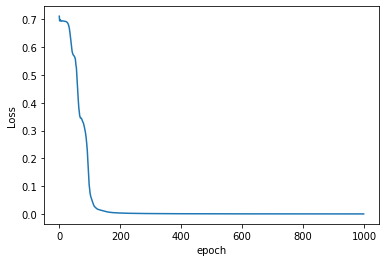

In [27]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [28]:
def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:,0])-0.25, max(X[:,0])+0.25) # Created equally spaced elements in x_span (will use for plotting)
    y_span = np.linspace(min(X[:,1])-0.25, max(X[:,1])+0.25) 
    # Created grid (returns two grid): https://www.geeksforgeeks.org/numpy-meshgrid-function/
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)
    plt.axis('scaled')

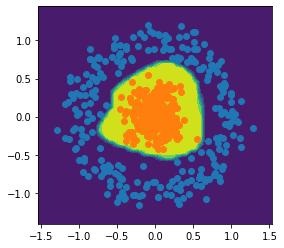

In [29]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is 1


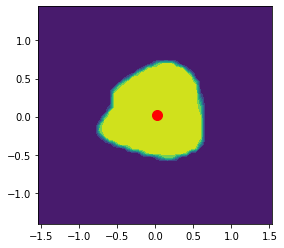

In [30]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is", prediction)
plot_decision_boundary(X, y)